In [1]:
#Data processing
import numpy as np
import pandas as pd

#NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

#for regex
import re 

#Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer

#Model Creation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

#WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#importing dataset
imdb_data= pd.read_csv('IMDB Dataset.csv')

#returns number of rows(50000) and columns(2)
print(imdb_data.shape)

#returns top 10 data
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
#checking for missing values in the data
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
#since no null data is present, 
#converting positive sentiments to 1 and negatives to -1
imdb_data.sentiment.replace('positive',1,inplace=True)
#inplace=True specifies to modify the existing DataFrame
#rather than to create a new one
imdb_data.sentiment.replace('negative',-1,inplace=True)
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,-1
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",-1
8,Encouraged by the positive comments about this...,-1
9,If you like original gut wrenching laughter yo...,1


In [5]:
#removal of HTML tags
def cleanHTMLtags(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)
#uncleaned data
print(imdb_data.review[0])
imdb_data.review = imdb_data.review.apply(cleanHTMLtags)
#clean data
imdb_data.review[0]

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [6]:
print(imdb_data.review[1])

#removing special characters: punctuations and non-alphanumeric
def removeSpecialCharacters(text):
    for i in text:
        if i.isalnum()==False and i != " ":
            text=text.replace(i,'')
    return text
imdb_data.review = imdb_data.review.apply(removeSpecialCharacters)
imdb_data.review[1]

A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [7]:
#converting all texts to lower case
def convertToLower(text):
    return text.lower()

imdb_data.review = imdb_data.review.apply(convertToLower)
imdb_data.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [8]:
#removing stop words like "the","in","for","where","to",etc
nltk.download('stopwords')
nltk.download('punkt')
def removeStopwords(text):
    stop_words = set(stopwords.words('english'))
    #word_tokenize extracts syllables from each word
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

imdb_data.review = imdb_data.review.apply(removeStopwords)
imdb_data.review[0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subriti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subriti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

In [9]:
#stemming words to its root; watching,watched to watch
def stemText(text):
    snowballStem = SnowballStemmer('english')
    return " ".join([snowballStem.stem(w) for w in text])

imdb_data.review = imdb_data.review.apply(stemText)
imdb_data.review[0]

'one review mention watch 1 oz episod youll hook right exact happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfo

In [10]:
#converting collection of raw documents into a matrix of TF-IDF features
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(imdb_data.review)
y = np.array(imdb_data.sentiment.values)

#setting random_state to a fixed value 2 means that every time the code is run, 
#the function will randomly split the data in the same way
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

#separating 30% data for test and 70% data for training

In [11]:
#creating MultinomialNB model
m=MultinomialNB(alpha=1.0,fit_prior=True)

#fitting training data
m.fit(x_train,y_train)

#predicting on test data
prediction=m.predict(x_test)

#Calculating performance metrics
print("Multinomial accuracy = ",accuracy_score(y_test,prediction))
print("Multinomial precision= ",precision_score(y_test,prediction))
print("Multinomial recall= ",recall_score(y_test,prediction))
print("Multinomial F1 score= ",f1_score(y_test,prediction))

Multinomial accuracy =  0.8598666666666667
Multinomial precision=  0.8712694264887911
Multinomial recall=  0.8445540594587388
Multinomial F1 score=  0.8577037638776063


In [12]:
#converting collection of raw documents into a matrix of TF-IDF features
#min_df=2 specifies the word must appear in atleast two documents to be included 
#max_df=0.5 specifies the word must appear in less than 50% of the documents in order to be included in the vocabulary.
#ngram_range=(1,2) extracts all unigrams (single words) and bigrams (pairs of words).
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
x = tfidf.fit_transform(imdb_data.review)
y = np.array(imdb_data.sentiment.values)

#setting random_state to a fixed value 2 means that every time the code is run, 
#the function will randomly split the data in the same way, which is useful for experimentation and debugging
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

#separating 30% data for test and 70% data for training

In [13]:
#creating MultinomialNB model
m=MultinomialNB(alpha=1.0,fit_prior=True)

#fitting training data
m.fit(x_train,y_train)

MultinomialNB()

In [14]:
#predicting on test data
prediction=m.predict(x_test)

#predictions
print(prediction)

#Calculating performance metrics
print("Multinomial accuracy = ",accuracy_score(y_test,prediction))
print("Multinomial precision= ",precision_score(y_test,prediction))
print("Multinomial recall= ",recall_score(y_test,prediction))
print("Multinomial F1 score= ",f1_score(y_test,prediction))

[-1 -1  1 ...  1 -1  1]
Multinomial accuracy =  0.8849333333333333
Multinomial precision=  0.8878441907320349
Multinomial recall=  0.8812158378882816
Multinomial F1 score=  0.8845175966813864


In [15]:
confusionMatrix= confusion_matrix(y_test, prediction)
print(confusionMatrix)

[[6664  835]
 [ 891 6610]]


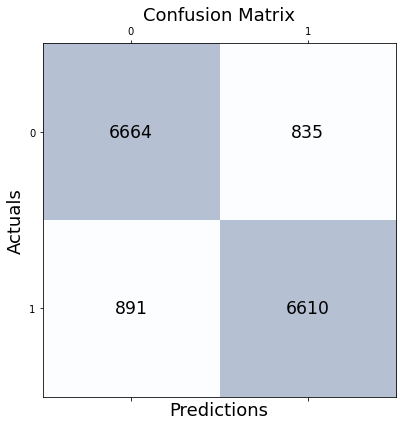

In [16]:
# Printing the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6.5, 6.5))
ax.matshow(confusionMatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionMatrix.shape[0]):
    for j in range(confusionMatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionMatrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

3        basic there famili littl boy jake think there ...
7        show amaz fresh innov idea 70s first air first...
8        encourag posit comment film look forward watch...
10       phil alien one quirki film humour base around ...
11       saw movi 12 came recal scariest scene big bird...
                               ...                        
49994    typic junk comedyther almost laugh genuin mome...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previous comment side maltin one...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 25000, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

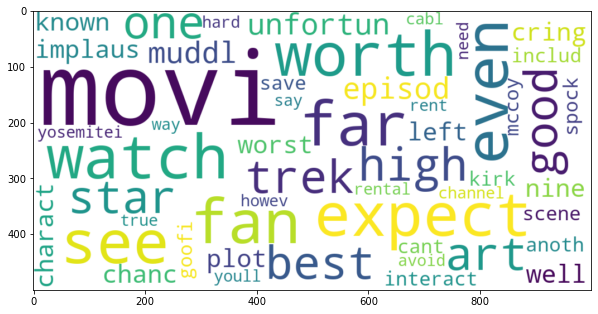

In [17]:
#word cloud for reviews words
WC=WordCloud(width=1000,height=500,max_words=2000,min_font_size=5, background_color="white")

plt.figure(figsize=(10,10))

#[imdb_data['sentiment']==-1] gives true or false for the condition
#imdb_data[imdb_data['sentiment']==-1] gives all the value/ columns fulfiling the condition
#imdb_data[imdb_data['sentiment']==-1]['review'] returns only the negative reviews column
negativeReviews=imdb_data[imdb_data['sentiment']==-1]['review']
print(negativeReviews)

for review in negativeReviews:
    #combining all the negative reviews into one text
    negative_text= "".join(review)
negative_words=WC.generate(negative_text)

#interpolation='bilinear' makes the displayed image appear more smoothly
plt.imshow(negative_words,interpolation='bilinear')
plt.show

0        one review mention watch 1 oz episod youll hoo...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
4        petter mattei love time money visual stun film...
5        probabl alltim favorit movi stori selfless sac...
                               ...                        
49983    love fan origin seri alway wonder back stori w...
49985    imaginari hero clear best film year complet ut...
49989    got one week ago love modern light fill true c...
49992    john garfield play marin blind grenad fight gu...
49995    thought movi right good job wasnt creativ orig...
Name: review, Length: 25000, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

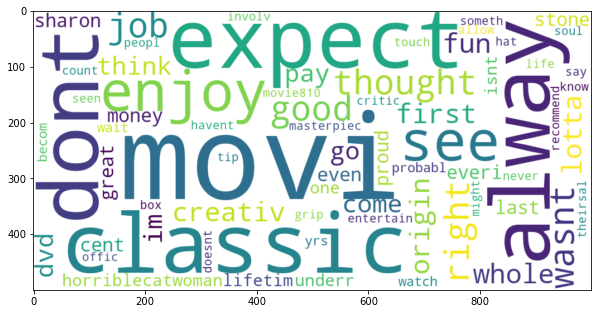

In [21]:
plt.figure(figsize=(10,10))

positiveReviews=imdb_data[imdb_data['sentiment']==1]['review']
print(positiveReviews)

for review in positiveReviews:
    #combining all the positive reviews into one text
    positive_text= "".join(review)
positive_words=WC.generate(positive_text)

#interpolation='bilinear' makes the displayed image appear more smoothly
plt.imshow(positive_words,interpolation='bilinear')
plt.show

In [26]:
#Checking the validity of the model with real-time reviews
while True:
    # Collecting user input
    user_input = input("Enter a review text (type 'exit' to stop): ")
    
    # Checking if the user wants to exit
    if user_input.lower() == 'exit':
        print("Exiting the loop.")
        break
    
    # Preprocessing the user input
    user_input = cleanHTMLtags(user_input)
    user_input = removeSpecialCharacters(user_input)
    user_input = convertToLower(user_input)
    user_input = removeStopwords(user_input)
    user_input = stemText(user_input)
    
    # Transforming the input text into a feature vector using pre-fit TF-IDF vectorizer
    input_vector = tfidf.transform([user_input])
    
    # Predicting sentiment
    prediction = m.predict(input_vector)
    
    # Interpreting the prediction
    if prediction == 1:
        sentiment_label = "Positive"
    else:
        sentiment_label = "Negative"
    
    print(f"The sentiment of the review is: {sentiment_label}")

Enter a review text (type 'exit' to stop): really hated the movie !!
The sentiment of the review is: Negative
Enter a review text (type 'exit' to stop): loved the movie, from characters to scenes everything was perfect
The sentiment of the review is: Positive
Enter a review text (type 'exit' to stop): exit
Exiting the loop.
